# Advanced Classification Predict 


## Introduction 

### What is Climate Change?

Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle.Human activities have been the main driver of climate change, primarily due to burning fossil fuels like coal, oil and gas.

Burning fossil fuels generates greenhouse gas emissions that act like a blanket wrapped around the Earth, trapping the sun’s heat and raising temperatures.



### Problem Statement 

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. **They would like to determine how people perceive climate change and whether or not they believe it is a real threat**. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

###  Data Overview 
For this exercise we will be using the data that was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

classes :
>**2** - **News**: the tweet links to factual news about the climate change

>**1** - **Pro**: the tweet support the believe of man made climate change

>**0** - **Neutral**: the tweet neither supports nor refutes the believe of manmade climate change

>**-1** - **Anti**: the tweet does not believe in man made climate change
 
Variable definitions:
> **sentiment** - Sentiment of tweet<br>
> **message** - Tweet body<br>
> **tweetid** - Twitter unique id<br>


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="a8U1gsvo2TOaRDxbnm3EUFg8I",
    project_name="advanced-classification-predict-on-climate-change",
    workspace="mcmunashe",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\mac07\\Documents\\Explore\\Advanced Classification\\Predict' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mcmunashe/advanced-classification-predict-on-climate-change/880f2f9c2882427db3aa821ef1b87e1a



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# needed for preprocessing
import re                                # library for regular expressions 
import string                            # for string operations 
import nltk
from nltk.corpus import stopwords        # module for stopwords that come with NLTK
from nltk.stem import PorterStemmer      # module for stemming 
from nltk.tokenize import TweetTokenizer # module for tokenizing strings 
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [3]:
pd.set_option('display.max_colwidth',200)

In [4]:
# Load files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')



<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [5]:
# Preview train dataset
train[train['sentiment']==-1].head() # View first rows of anit-climate change tweeets


,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141
48,-1,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263


In [6]:
train[train['sentiment']==0].head() # View first rows of neutral tweeets

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\n-sees replies begging him to come to their countries-\nCalum: *goes back to rting climate change*,547924
22,0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545
30,0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051
39,0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368
43,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916


In [7]:
train[train['sentiment']==1].head() # View first rows of pro-climate change tweeets

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577


In [8]:
train[train['sentiment']==2].head() # View first rows of news tweeets

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
12,2,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673
14,2,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092
26,2,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291
32,2,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471


Looking at just the first few rows, looks like we have emojis, links, RT tags, Hashtags, Mentions.

We will need to clean this up

In [9]:
# Preview test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [10]:
# Preview sample submission file
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [11]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((15819, 3), (10546, 2), (10546, 2))

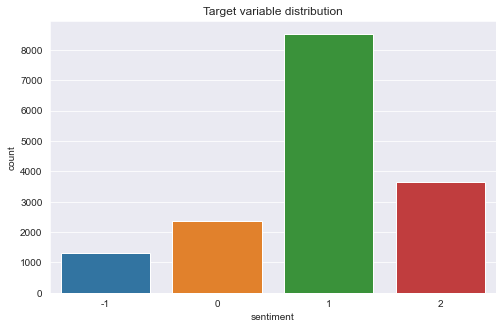

In [12]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["sentiment"])
plt.title('Target variable distribution')
plt.show()

In [14]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

The target variable is not well balanced.
Some of the techniques to handle imbalanceness include:
- Smote
- Oversampling
- Undersampling ...

In [13]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(False, False)

No misssing values 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [24]:
combine=train.append(test, ignore_index=True)# train and test dataset are combined
combine.shape

(26365, 3)

In [25]:
def remove_pattern(input_text, pattern):
    """
    Cleans text by removing a regular expression we specify 
    
    parameters:
    text: A string(a sequence of characters)
    pattern: A regular expression pattern
    
    returns:
    input_text: a string
    
    
    """
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text 

### Cleaning the message column

In [26]:
combine['clean_text'] = np.vectorize(remove_pattern)(combine['message'], '@[\w]*') # removes the Mentions 

combine.head()

,sentiment,message,tweetid,clean_text
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via"
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"


In [27]:
combine['clean_text'] = combine['clean_text'].str.replace('https?:\/\/\S+', ' ') # replace https links with whitespace



In [28]:
combine.head(10)

,sentiment,message,tweetid,clean_text
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? via"
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"
5,1.0,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577,Worth a read whether you do or don't believe in climate change
6,1.0,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,294933,RT : Mike Pence doesn’t believe in global warming or that smoking causes lung cancer.
7,1.0,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",992717,"RT : Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ hÃ¢â‚¬Â¦"
8,1.0,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",664510,"My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change."
9,1.0,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,260471,RT : no offense… but like… how do you just not believe… in global warming………


In [29]:
combine[combine['sentiment']==-1].head()

,sentiment,message,tweetid,clean_text
28,-1.0,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ via Need we say more
46,-1.0,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141,Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!
48,-1.0,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523,"RT : We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…"
56,-1.0,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385,lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️
57,-1.0,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263,RT : This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…


In [32]:
combine['clean_text'] = combine['clean_text'].str.replace('[^a-zA-Z#]', ' ') # replaces all the emojis with whitespace

combine.head(10)

,sentiment,message,tweetid,clean_text
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and wait what via
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,It s not like we lack evidence of anthropogenic global warming
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT Researchers say we have three years to act on climate change before it s too late
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED was a pivotal year in the war on climate change
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,RT It s and a racist sexist climate change denying bigot is leading in the polls #ElectionNight
5,1.0,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577,Worth a read whether you do or don t believe in climate change
6,1.0,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,294933,RT Mike Pence doesn t believe in global warming or that smoking causes lung cancer
7,1.0,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",992717,RT Six big things we can ALL do today to fight climate change or how to be a climate activist h
8,1.0,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",664510,My yo nephew is inconsolable He wants to die of old age like me but will perish in the fiery hellscape of climate change
9,1.0,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,260471,RT no offense but like how do you just not believe in global warming


In [33]:
combine[combine['sentiment']==-1].head()

,sentiment,message,tweetid,clean_text
28,-1.0,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491,Sally Kohn s latest evidence of climate change proves she is not a smart person via Need we say more
46,-1.0,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141,Carbon Tax is a Globalist idea to enslave the world s population It is the whole reason for propagating global warming
48,-1.0,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523,RT We had winds close to MPH in the area this afternoon I would blame climate change except that this happens pr
56,-1.0,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385,lmao snowflakes complaining about snowflakes in winter global warming
57,-1.0,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263,RT This is ONE of Arnold Schwarzenegger s vehicles He is now whining about climate change How s his maid illegal or http


In [34]:
combine['clean_text'] = combine['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 3])) #removing words whose length is greater than 3


In [35]:
combine.head()

,sentiment,message,tweetid,clean_text
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,PolySciMajor chief doesn think carbon dioxide main cause global warming wait what
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,Researchers have three years climate change before late
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED pivotal year climate change
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,racist sexist climate change denying bigot leading polls #ElectionNight


In [36]:
tokenized_tweet = combine['clean_text'].apply(lambda x:x.split()) #it will split words by whitespace 

tokenized_tweet.head()

0    [PolySciMajor, chief, doesn, think, carbon, dioxide, main, cause, global, warming, wait, what]
1                                            [like, lack, evidence, anthropogenic, global, warming]
2                                  [Researchers, have, three, years, climate, change, before, late]
3                                           [#TodayinMaker#, WIRED, pivotal, year, climate, change]
4                 [racist, sexist, climate, change, denying, bigot, leading, polls, #ElectionNight]
Name: clean_text, dtype: object

In [37]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # it will stemmatize all the words in tweet


In [38]:
# now let's combine these tokens back 

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['clean_text'] = tokenized_tweet



In [39]:
combine.head()

,sentiment,message,tweetid,clean_text
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor chief doesn think carbon dioxid main caus global warm wait what
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,like lack evid anthropogen global warm
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,research have three year climat chang befor late
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wire pivot year climat chang
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,racist sexist climat chang deni bigot lead poll #electionnight


### Separate word clouds 

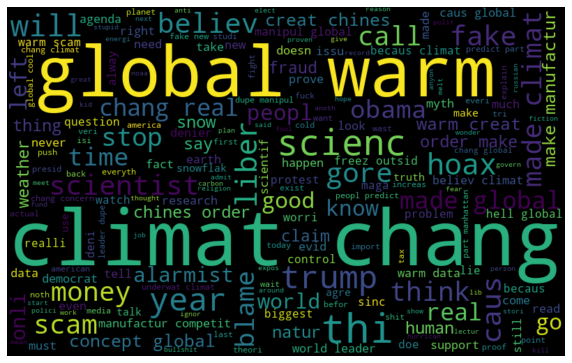

In [40]:
anti = ' '.join([text for text in combine['clean_text'][combine['sentiment']==-1]]) 
wordcloud = WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(anti)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

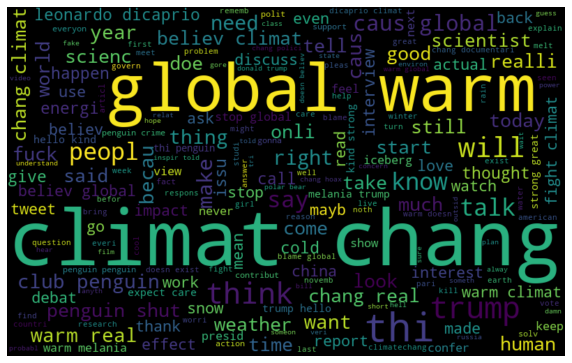

In [41]:
neutral = ' '.join([text for text in combine['clean_text'][combine['sentiment']==0]]) 
wordcloud = WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(neutral)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

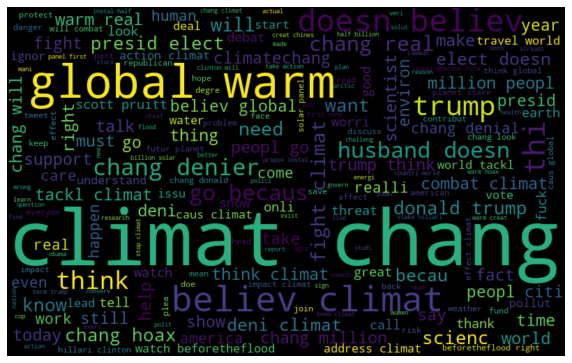

In [42]:
pro = ' '.join([text for text in combine['clean_text'][combine['sentiment']==1]]) 
wordcloud = WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(pro)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

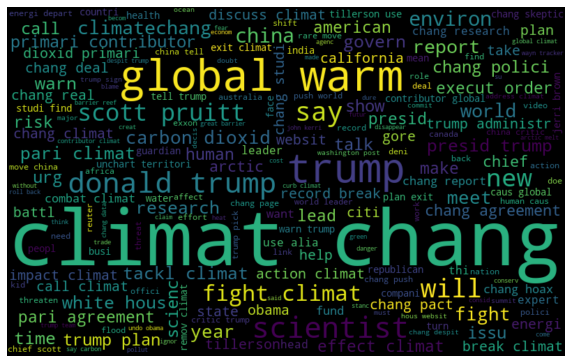

In [43]:
news = ' '.join([text for text in combine['clean_text'][combine['sentiment']==2]]) 
wordcloud = WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(news)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
#collect hashtags

def hashtag_extract(x):
    """
    Extracts hashtag from the tweet by using the regular expression findall.
    Stores hashtags in a list.
    
    parameters:
    x: A string(a sequence of characters)

    returns:
    hashtags: a list
    
    
    """
    hashtags = []
    for i in x: #loop over words contained in tweet 
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags 

In [45]:
#extracting hashtags from anti climate change tweets
ht_anti = hashtag_extract(combine['clean_text'][combine['sentiment']==-1])

#extracting hashtags from neutral climate change tweets
ht_neutral = hashtag_extract(combine['clean_text'][combine['sentiment']==0])

#extracting hashtags from pro climate change tweetscombine
ht_pro = hashtag_extract(combine['clean_text'][combine['sentiment']==1])

#extracting hashtags from news climate change tweets
ht_news = hashtag_extract(combine['clean_text'][combine['sentiment']==2])

ht_anti = sum(ht_anti,[])
ht_neutral = sum(ht_neutral,[])
ht_pro = sum(ht_pro,[])
ht_news = sum(ht_news,[])


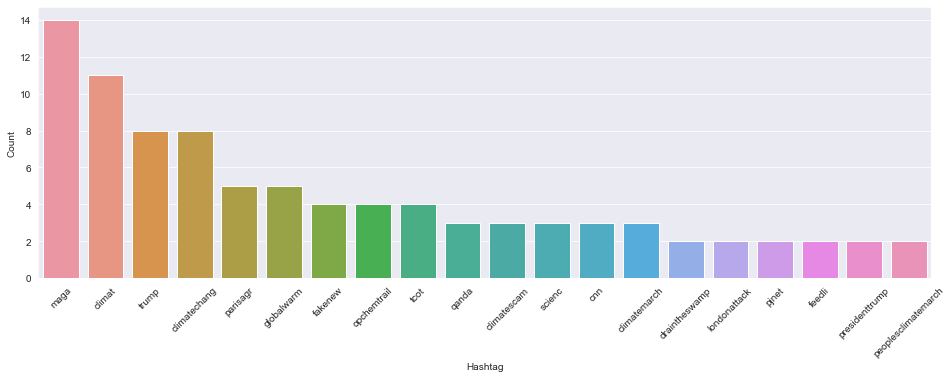

In [46]:
# anti climate changes tweets 

anti = nltk.FreqDist(ht_anti)
df = pd.DataFrame({'Hashtag': list(anti.keys()), 'Count':list(anti.values())})

#Selecting top 20 most frequent hashtags
df = df.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

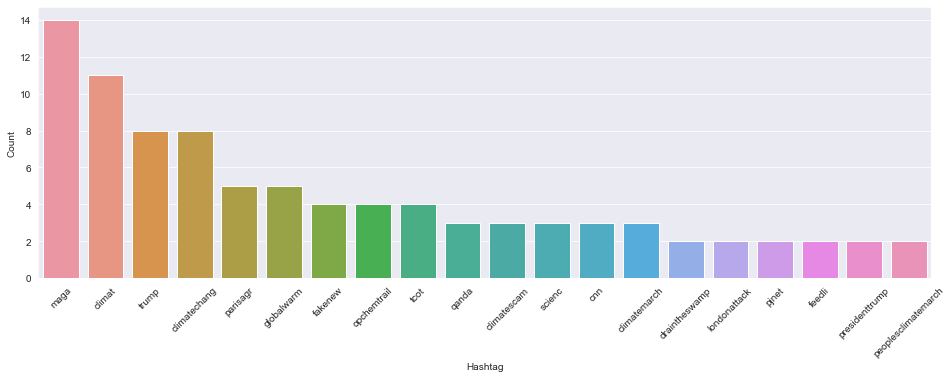

In [47]:
# neutral climate changes tweets 

neutral = nltk.FreqDist(ht_neutral)
df0 = pd.DataFrame({'Hashtag': list(neutral.keys()), 'Count':list(neutral.values())})

#Selecting top 20 most frequent hashtags
df0 = df0.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

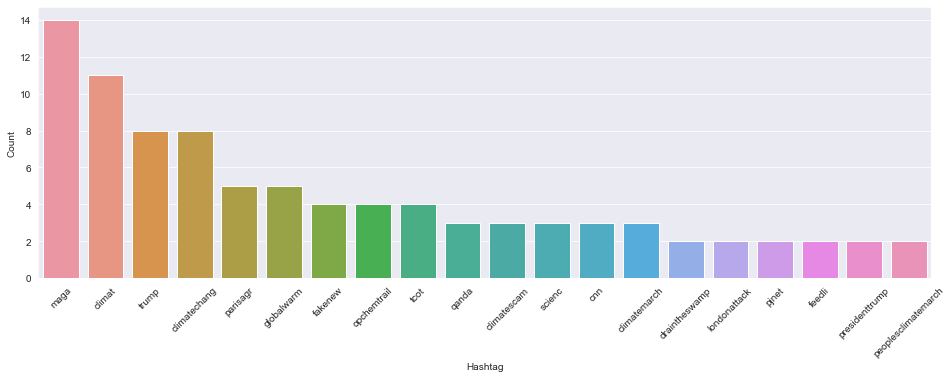

In [48]:
# pro climate changes tweets 

pro = nltk.FreqDist(ht_pro)
df1 = pd.DataFrame({'Hashtag': list(pro.keys()), 'Count':list(pro.values())})

#Selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

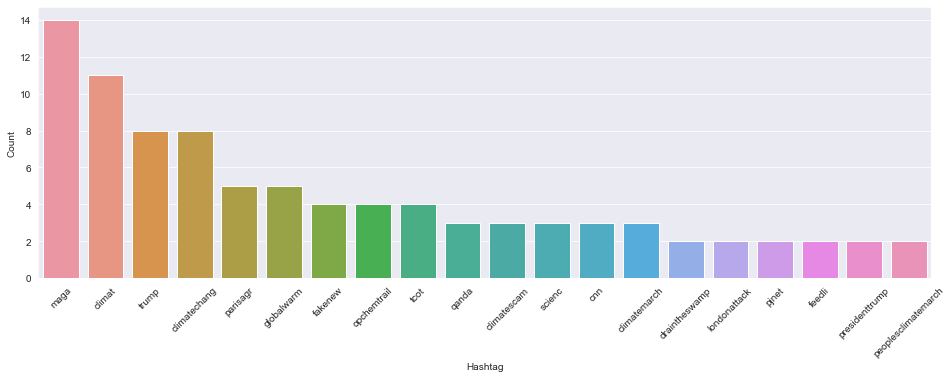

In [49]:
# neutral climate changes tweets 

news = nltk.FreqDist(ht_news)
df2 = pd.DataFrame({'Hashtag': list(news.keys()), 'Count':list(news.values())})

#Selecting top 20 most frequent hashtags
df2 = df2.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
df_train = combine[~combine['sentiment'].isna()]
df_test = combine[combine['sentiment'].isna()]
df_test = df_test.drop(columns = ['sentiment','message']) # Drop columns Sentiment and message from the df dataframe


In [55]:
# Bag of words 

#Each row in matrix M contains the frequency of token(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df_train['clean_text']) #tokenize and build vocabulary
bow.shape

(15819, 1000)

In [56]:
combine=combine.fillna(0) #replace all null values by 0
# transform the dataset
oversample = SMOTE(random_state = 42)
X_res, y_res = oversample.fit_resample(bow, df_train['sentiment'])

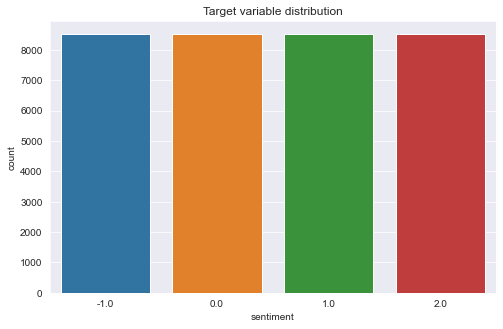

In [59]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(y_res)
plt.title('Target variable distribution')
plt.show()

In [ ]:
# X_res.shape

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [60]:

X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [61]:
print('X_train_shape:', X_train.shape)
print('X_test_shape:', X_test.shape)
print('y_train_shape:', y_train.shape)
print('y_test_shape:', y_test.shape)


X_train_shape: (27296, 1000)
X_test_shape: (6824, 1000)
y_train_shape: (27296,)
y_test_shape: (6824,)


### we will use Multinomial Naive Bayes Classifier

In [62]:
model_naive = MultinomialNB().fit(X_train,y_train)
pred_naive = model_naive.predict(X_test)

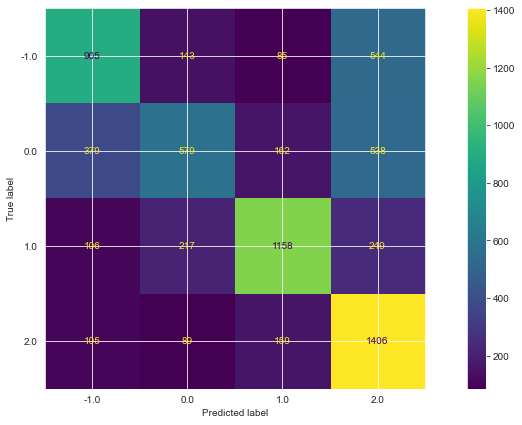

In [63]:
# Confusion matrix
s = confusion_matrix(y_test, pred_naive, labels=model_naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=s, display_labels=model_naive.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

In [64]:
# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, pred_naive)}')
print('\n')
print(f'{classification_report(y_test, pred_naive)}')

Accuracy score: 0.593200468933177


              precision    recall  f1-score   support

        -1.0       0.61      0.54      0.57      1677
         0.0       0.56      0.35      0.43      1658
         1.0       0.74      0.67      0.70      1730
         2.0       0.51      0.80      0.63      1759

    accuracy                           0.59      6824
   macro avg       0.61      0.59      0.58      6824
weighted avg       0.61      0.59      0.58      6824



In [66]:
# Bag of words 

#Each row in matrix M contains the frequency of token(words) in the document D(i)

test_vecto = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow_test = test_vecto.fit_transform(df_test['clean_text']) #tokenize and build vocabulary
bow_test.shape

(10546, 1000)

In [67]:
prediction = model_naive.predict(bow_test)

In [72]:
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [71]:
# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.sentiment = prediction
sub_file.head()

,tweetid,sentiment
0,169760,1.0
1,35326,1.0
2,224985,1.0
3,476263,1.0
4,872928,2.0


In [70]:
# Create file
sub_file.to_csv('Submission.csv', index = False)

### we will use Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>